In [1]:
import pandas as pd
from util import *
from googletrans import Translator

ModuleNotFoundError: No module named 'googletrans'

## FUNCTIONS

In [2]:
import sys
from string import punctuation

def strip_punctuation(s):
    
    return ''.join(c for c in s if c not in punctuation)

def common_words(x, n=5, more_stops = [], remove_stop_words = True):
    '''
    Takes in a .txt file or a string and returns the most commonly used word. 
    '''

    if type(x) is not str:
        x = open(x, 'r', encoding = 'latin-1')
        x = x.read()

    x = strip_punctuation(x)
    lx = x.lower().split()
    
    STOP_WORDS = [ "a", "about", "above", "after", "again", "nan", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    
    if len(more_stops) > 0:
        STOP_WORDS = STOP_WORDS + more_stops
        
    if remove_stop_words:
         lx = [w for w in lx if w not in STOP_WORDS]
    
    d = {}
    for word in lx:
        if word not in d.keys():
            d[word] = 1
        else:
            d[word] += 1

    most_common = sorted(d, key = d.get, reverse=True)[:n]
            
    #print("The " + str(n) + " most common words are: " + ( ", ".join( e for e in most_common)) + ".")
    return most_common

Data Source: https://www.kaggle.com/vikasg/russian-troll-tweets/data

Twitter Data Dictionary: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object

In [3]:
tweets = pd.read_csv('tweets.csv')
users = pd.read_csv('users.csv')

FileNotFoundError: File b'tweets.csv' does not exist

In [3]:
"tweets", tweets.shape, "users", users.shape

('tweets', (203482, 16), 'users', (454, 14))

In [4]:
tweets = tweets.rename(index=str, columns={"user_id": "id"})
tweets = tweets.rename(index=str, columns={"user_key": "screen_name"})

tc, uc = set(tweets.columns), set(users.columns)
cc = tc.intersection(uc)
combined = pd.merge(tweets, users, how='left', on='screen_name')

In [26]:
combined.shape

(203482, 29)

### In the Data Frame "combined" each of the rows is a single tweet

In [20]:
users.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [32]:
tweets.head()

,id,screen_name,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [33]:
ht = find_top(tweets, "hashtags", sort_by='id', ascending=False)
ht = ht[['id']]
ht.columns = ['num_tweets']
ht = ht[ht.num_tweets > 100]
ht = ht[ht.index != '[]']

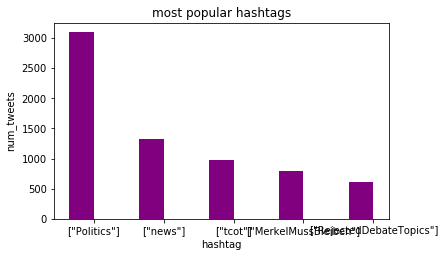

In [34]:
ht5 = ht.head(5)
plot_bar_chart(ht5.index, ht5.num_tweets, 'hashtag', 'num_tweets', 'most popular hashtags', width = 0.35, color = 'purple')

In [35]:
#top_users = find_top(combined, "id", sort_by='user_key')
#top_users = top_users[['location', 'name', 'followers_count',
#       'statuses_count', 'time_zone', 'verified', 'lang', 'screen_name',
#       'description', 'favourites_count', 'friends_count', 'listed_count']]

In [36]:
common_ucols = ['location', 'time_zone', 'verified', 'lang']
for c in common_ucols:
    x = users[c].unique()
    print(c, len(x))
    print(x)

location 108
['near Utah Ave & Lighthouse an' 'still ⬆️Block⤵️Corner⬇️street'
 'Chicago, IL' nan 'Санкт-Петербург, Россия' 'Amerika' 'USA'
 'Philadelphia, PA' 'ATL' 'United States' 'New York, USA' 'Alaska' 'NY'
 'Florida' 'St Louis, MO' 'US' 'Baltimore' 'Baton Rouge, LA' 'America'
 'Georgia, USA' 'Los Angeles, CA' 'Texas, USA' 'Baltimore, MD'
 'USA, Atlanta' 'Florida, USA' 'NYC' 'Москва, Россия' 'Мурманск'
 'Санкт-Петербург' 'Калининград, Россия' 'San Francisco, CA' 'Москва'
 'Калуга, Россия' 'Я везде' 'Ярославль, Россия' 'Питер' 'Moscow'
 'Washington, DC' 'Atlanta' 'Чита' 'New York' 'Atlanta, Georgia'
 'Барнаул, Россия' 'Atlanta, GA' 'New - York' 'Memphis, TN'
 'Detroit, Michigan' 'Russia' 'Ростов-на-Дону, Россия' 'Санкт-Петербург '
 'Россия' 'Тула, Тульская область' 'Montgomery' 'Kansas City, MO'
 'Pittsburgh, PA' 'arkansas' 'Boston' 'Washington, D.C.' 'New York, NY'
 'City of Cleveland, USA' 'City of Phoenix, Arizona'
 'City of San Antonio, TX' 'Pittsburgh, US' 'Richmond, VA' 'Newar

In [37]:
tl = find_top(users, 'lang', sort_by='id', ascending=False)
tl = tl['id']
t1 = tl.apply(lambda x: (x / 454)*100)

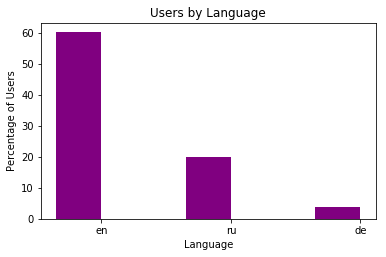

In [38]:
t1_3 = t1.head(3)
plot_bar_chart(t1_3.index, t1_3, "Language", "Percentage of Users", "Users by Language", width = 0.35, color = 'purple')

In [40]:
combined.columns

Index(['id_x', 'screen_name', 'created_at_x', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id', 'id_y', 'location', 'name', 'followers_count',
       'statuses_count', 'time_zone', 'verified', 'lang', 'description',
       'created_at_y', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

### None of the tweets come from verified users. (thank god!)

In [46]:
 combined[combined.verified =='True']

,id_x,screen_name,created_at_x,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,...,followers_count,statuses_count,time_zone,verified,lang,description,created_at_y,favourites_count,friends_count,listed_count


In [26]:
combined.style
mdf = combined[combined.time_zone =='Moscow']
vdf = combined[combined.time_zone =='Volgograd']
rus_df = pd.concat([mdf, vdf])
mdf.shape, vdf.shape, rus_df.shape

((14, 29), (70, 29), (84, 29))

In [25]:
rus_df

,id_x,screen_name,created_at_x,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,...,followers_count,statuses_count,time_zone,verified,lang,description,created_at_y,favourites_count,friends_count,listed_count
1312,8.758894e+07,anzgri,1.469908e+12,2016-07-30 19:51:07,0.0,False,0.0,What more needs to be said. Clinton/Putin 2016...,7.594764e+17,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",...,1267.0,61735.0,Moscow,False,ru,Никто.,Thu Nov 05 01:44:48 +0000 2009,75.0,36.0,111.0
8976,2.504171e+09,patriotka_rusi,1.476947e+12,2016-10-20 07:01:11,0.0,False,0.0,RT @RT_com: #Clinton shifts debate away from #...,7.889985e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,75.0,548.0,Moscow,False,ru,умная,Wed Apr 23 14:33:08 +0000 2014,631.0,87.0,4.0
25888,2.504171e+09,patriotka_rusi,1.477581e+12,2016-10-27 15:11:48,0.0,False,0.0,"RT @TrumpD2016: ""@ABC .@realDonaldTrump tells ...",7.916587e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,75.0,548.0,Moscow,False,ru,умная,Wed Apr 23 14:33:08 +0000 2014,631.0,87.0,4.0
29245,8.758894e+07,anzgri,1.473755e+12,2016-09-13 08:25:54,0.0,False,0.0,https://t.co/ffpjepXb3E,7.756114e+17,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",...,1267.0,61735.0,Moscow,False,ru,Никто.,Thu Nov 05 01:44:48 +0000 2009,75.0,36.0,111.0
49187,2.512994e+09,rusnevrotik,1.478653e+12,2016-11-09 00:48:50,0.0,False,0.0,RT @RomaAcorn: #ImWithHumusMarshmallowsPeanutB...,7.961525e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,97.0,1912.0,Moscow,False,ru,NaN,Sun Apr 27 16:34:47 +0000 2014,2658.0,120.0,1.0
55452,7.357903e+17,bydrbre_,1.478605e+12,2016-11-08 11:37:44,1.0,False,3.0,Сегодня ночью можете удалять все ваши мемы про...,7.959534e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,14353.0,1035.0,Moscow,False,ru,секси-генсекси. #бровибрежнева снова в деле. ...,Thu May 26 11:10:56 +0000 2016,96.0,6565.0,19.0
62879,2.504171e+09,patriotka_rusi,1.478357e+12,2016-11-05 14:44:05,0.0,False,0.0,"RT @HuffPostPol: ""I want my daughter to grow u...",7.949132e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,75.0,548.0,Moscow,False,ru,умная,Wed Apr 23 14:33:08 +0000 2014,631.0,87.0,4.0
63079,2.588789e+09,gorelkinnn,1.478771e+12,2016-11-10 09:37:31,0.0,False,0.0,RT @realDonaldTrump: Video game violence &amp;...,7.966480e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,98.0,999.0,Moscow,False,ru,любитель всяких глупостей,Thu Jun 26 03:43:22 +0000 2014,2029.0,340.0,1.0
95688,2.512994e+09,rusnevrotik,1.479457e+12,2016-11-18 08:11:19,0.0,False,0.0,RT @tina_kandelaki: Donald Trump Teases a Pres...,7.995254e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,97.0,1912.0,Moscow,False,ru,NaN,Sun Apr 27 16:34:47 +0000 2014,2658.0,120.0,1.0
98178,2.504171e+09,patriotka_rusi,1.477887e+12,2016-10-31 04:09:05,0.0,False,0.0,RT @RT_com: #Iceland PM resigns following Satu...,7.929414e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",...,75.0,548.0,Moscow,False,ru,умная,Wed Apr 23 14:33:08 +0000 2014,631.0,87.0,4.0


### These are the top hashtags from tweets by someone in a Russian time zone. 

In [40]:
rus_top_ht = find_top(rus_df, 'hashtags', sort_by='id_x', ascending=False)
list(rus_top_ht.index[1:11])

['["YEMEN"]',
 '["Trump","Trump"]',
 '["ImwithChickenAvocadoSubwayDressedwithSweetOnionAndDoubleHoneyMustard","ImWithHumusMarshmallowsPeanutButterSteakRibeye"]',
 '["Trump"]',
 '["ImWithHumusMarshmallowsPeanutButterSteakRibeye","ImwithChickenAvocadoSubwayDressedwithSweetOnionAndDoubleHoneyMustard"]',
 '["Clinton"]',
 '["Wisconsin"]',
 '["Podesta31"]',
 '["Anonymous"]',
 '["Obama","DAPL"]']

In [42]:
usa_df = combined[combined['time_zone'].str.contains("(US & Canada)")]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


### These are the top hashtags from tweets by someone in an American time zone. 

In [44]:
usa_top_ht = find_top(usa_df, 'hashtags', sort_by='id_x', ascending=False)
list(usa_top_ht.index[1:11])

['["teapartynews"]',
 '["SurvivalGuideToThanksgiving"]',
 '["RejectedDebateTopics"]',
 '["ToDoListBeforeChristmas"]',
 '["ThingsYouCantIgnore"]',
 '["IGetDepressedWhen"]',
 '["MustBeBanned"]',
 '["tcot"]',
 '["nowplaying"]',
 '["2016In4Words"]']

In [52]:
su = users.head(10)

In [117]:
def get_desc_words(df):
    descs = ''
    for row in range(len(df)):
        descs = descs + " " + str(df.iloc[row]['description'])
    return descs

In [118]:
all_descs = get_desc_words(users)

In [122]:
tweet_stops = ['us', 'not', 'dm', 'will', 'и','в','не','im']

### These are the most common words used in a user's profile description.

In [179]:
common_words(descs, n = 10, more_stops = tweet_stops)

['news',
 'conservative',
 'blacklivesmatter',
 'tcot',
 'love',
 'breaking',
 'black',
 'people',
 'politics',
 'pjnet']

'tcot' stands for "top conservatives"

In [120]:
m_udf = users[users.time_zone =='Moscow']
v_udf = users[users.time_zone =='Volgograd']
rus_users = pd.concat([m_udf, v_udf])
rus_descs = get_desc_words(rus_users)

In [175]:
sw_russian = ['—','ha',
 'либо',"c","а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видел","видеть","вместе","вне","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","все еще","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делал","делать","делаю","дело","день","деньги","десятый","десять","для","до","довольно","долго","должен","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","иди","идти","из","или","им","имеет","имел","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могу","могут","мож","может","может быть","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ним","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","откуда","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подойди","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","путь","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","с кем","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твои","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотел бы","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я","являюсь"]

Source: https://github.com/stopwords-iso/stopwords-ru

### These are the most common words used in a user's profile description for users in a Russian timezone.

In [176]:
rus_users_common = common_words(rus_descs, n = 10, more_stops = sw_russian)
rus_users_common

['россию',
 'родина',
 'аккаунт',
 'люблю',
 'доблесть',
 'человека',
 'пародийный',
 'стану',
 'мила',
 'добра']

In [177]:
translator = Translator()

In [178]:
translations = translator.translate(rus_users_common, dest='en')
for translation in translations:
    print(translation.origin, ' -> ', translation.text)

россию  ->  Russia
родина  ->  family
аккаунт  ->  account
люблю  ->  I love
доблесть  ->  valor
человека  ->  rights
пародийный  ->  parodic
стану  ->  I will be
мила  ->  honey
добра  ->  good
